In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ISLP

In [2]:
from ISLP import load_data
auto = load_data('Auto')
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [3]:
auto.shape

(392, 8)

In [4]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object

In [6]:
# a) creating mpg01
median = auto.mpg.median()
auto.loc[(auto['mpg'] >= median), 'mpg01'] = 1
auto.loc[(auto['mpg'] < median), 'mpg01'] = 0

In [7]:
#correcting datatypes
auto['mpg01'] = auto['mpg01'].astype(int)


In [8]:
# b) checking association between mpg01 and the other features
correlation_matrix = auto.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416

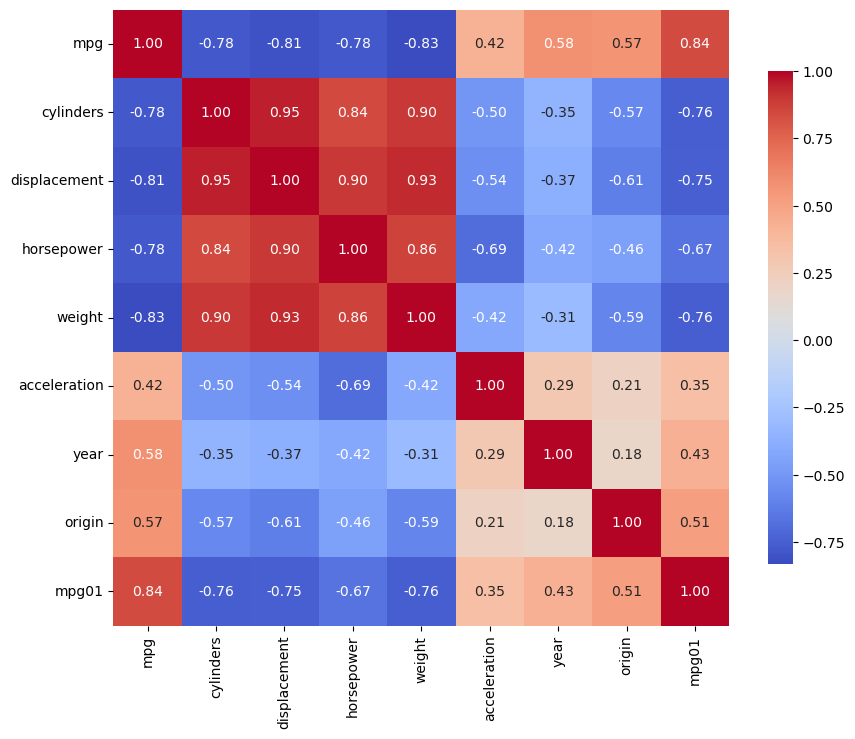

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.show()

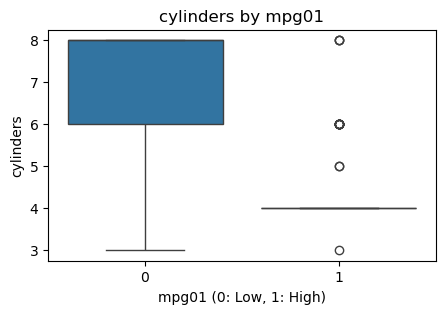

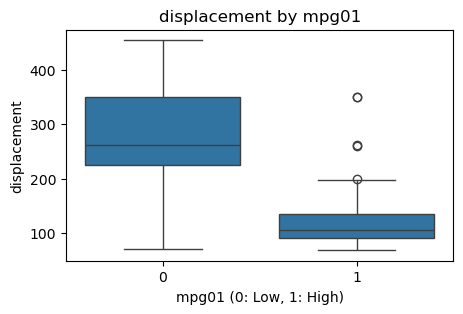

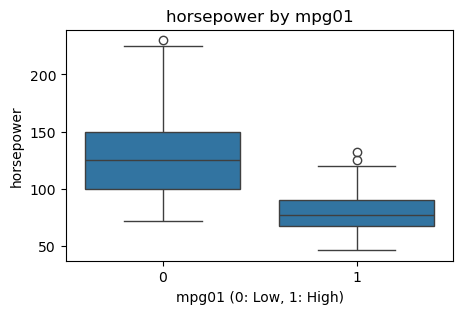

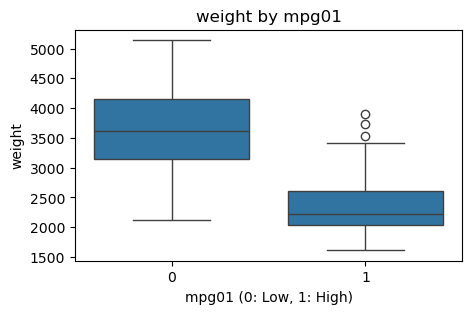

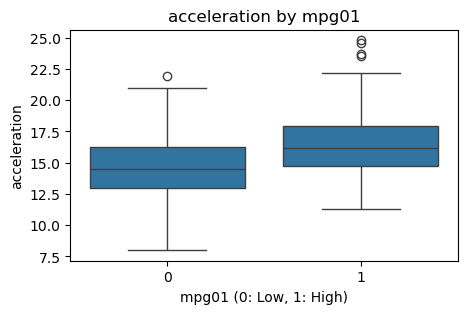

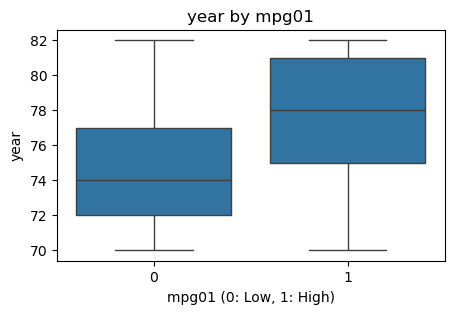

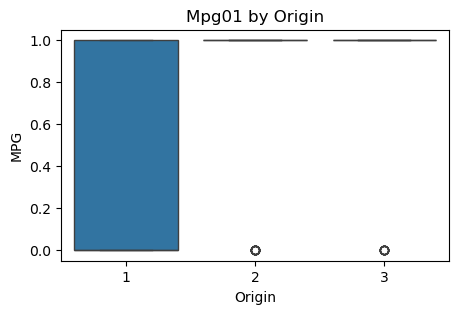

In [16]:
cols = auto.columns.drop(['mpg', 'mpg01','origin'])  # Exclude mpg and mpg01 also origin since its categorical,plotted seperately
for col in cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='mpg01', y=col, data=auto)
    plt.title(f'{col} by mpg01')
    plt.xlabel('mpg01 (0: Low, 1: High)')
    plt.ylabel(col)
    plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(x='origin', y='mpg01', data=auto)
plt.title('Mpg01 by Origin')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()

### We can see that the cylinders, horspower, weight, displacement are strongly associated with median value of mpg01. Year of make, origin and acceleartions are also linearly associated, earlier years tend to have lower than median mpg values as compared to later models, similarly for acceleration, but not as strongly associated as other predictors. creates issue of multicollinearity so removing that from further analysis. 

In [18]:
auto.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'mpg01'],
      dtype='object')

In [20]:
# c) splititng the dataset - only with most associated
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(auto.loc[:, ['cylinders', 'displacement', 'weight','horsepower']], auto['mpg01'], train_size=0.8, random_state=1)

In [22]:
# d) perfoming LDA analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix
lda = LDA() #creating the object 
lda.fit(X_train, y_train) #no transform at this point
y_pred_lda = lda.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_lda)
print(f'Accuracy: {acc_score}')
lda_test_error = 1 - acc_score
print(f'LDA Test Error: {lda_test_error:.3f}')

Accuracy: 0.9367088607594937
LDA Test Error: 0.063


In [24]:
#e) Performing QDA analysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train, y_train)

acc_score = accuracy_score(y_test, qda.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'QDA - Test Error: {1-acc_score}')

Accuracy: 0.9620253164556962
QDA - Test Error: 0.03797468354430378


In [26]:
#f) Logidtic Regression
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(fit_intercept=True)
logit.fit(X_train, y_train)

acc_score = accuracy_score(y_test, logit.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Logistic Regression - Test Error: {1-acc_score}')

Accuracy: 0.9493670886075949
Logistic Regression - Test Error: 0.05063291139240511


In [28]:
#g) Naive Bayes 
from sklearn.naive_bayes import GaussianNB
nbayes = GaussianNB()
nbayes.fit(X_train, y_train)

acc_score = accuracy_score(y_test,nbayes.predict(X_test))
print(f'Accuracy: {acc_score}')
print(f'Naive Bayes - Test Error: {1-acc_score}')

Accuracy: 0.9493670886075949
Naive Bayes - Test Error: 0.05063291139240511


In [30]:
#h) KNN
from sklearn.neighbors import KNeighborsClassifier as KNN
k_values = [1, 3, 5, 10, 25]

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    acc_score = accuracy_score(y_test, knn.predict(X_test))
    print(f'K-value: {k}')
    print(f'Accuracy: {acc_score}')
    print(f'KNN - Test Error: {1-acc_score}')
    print('-'*20)

K-value: 1
Accuracy: 0.8734177215189873
KNN - Test Error: 0.12658227848101267
--------------------
K-value: 3
Accuracy: 0.8987341772151899
KNN - Test Error: 0.10126582278481011
--------------------
K-value: 5
Accuracy: 0.8734177215189873
KNN - Test Error: 0.12658227848101267
--------------------
K-value: 10
Accuracy: 0.9113924050632911
KNN - Test Error: 0.08860759493670889
--------------------
K-value: 25
Accuracy: 0.8987341772151899
KNN - Test Error: 0.10126582278481011
--------------------


### interpretation 
Best performing is QDA, since its closest model to underlying true form . Naive Bayes and Logistic regression give nearly 94% accuracy, KNN value of 10 seems the optimal one with lowest test error but still not as good at classifying as the other models.

In [34]:
#2) #defining power for fixed values

def Power(): #this will need no arguments
    print(2**3)
Power()

8


In [36]:
#b)
def Power2(x, a):
    print(x**a)
Power2(3, 8) #calling the function 

6561


In [38]:
#c)
#10^3 
Power2(10,3)
#8^17
Power2(8,17)
#131^3
Power2(131,3)

1000
2251799813685248
2248091


In [40]:
#d)
def Power3(x, a):
    if type(x) == list or type(x) == range: #based on the next question asking to plot range
        return np.power(x, a)
        


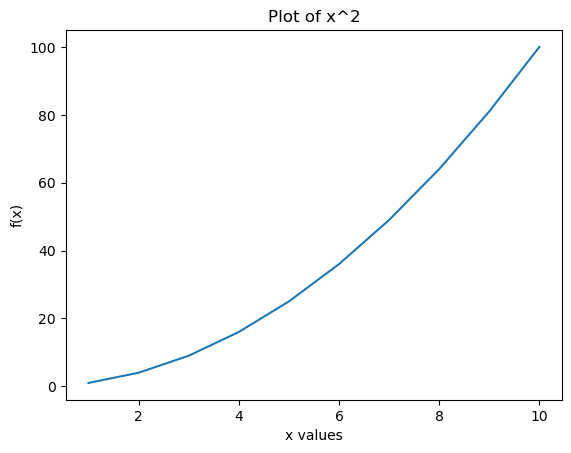

In [42]:
#e)
x_range = range(1, 11, 1)
plt.plot(x_range, Power3(x_range, 2))
plt.title('Plot of x^2')
plt.xlabel('x values')
plt.ylabel('f(x)')
plt.show()




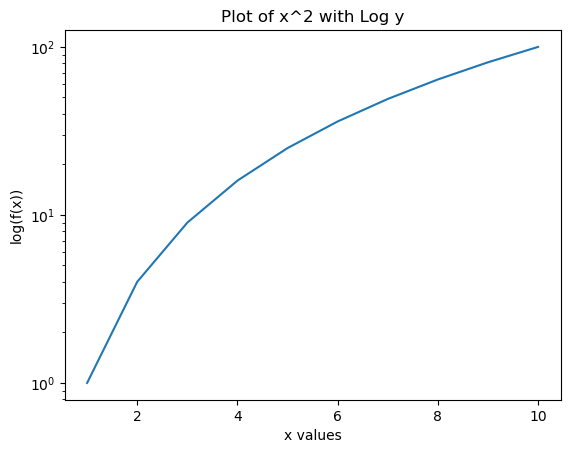

In [44]:
#e)
x_range = range(1, 11)
plt.plot(x_range, Power3(x_range, 2))
plt.yscale('log')  # log scale
plt.title('Plot of x^2 with Log y')
plt.xlabel('x values')
plt.ylabel('log(f(x))')
plt.show()

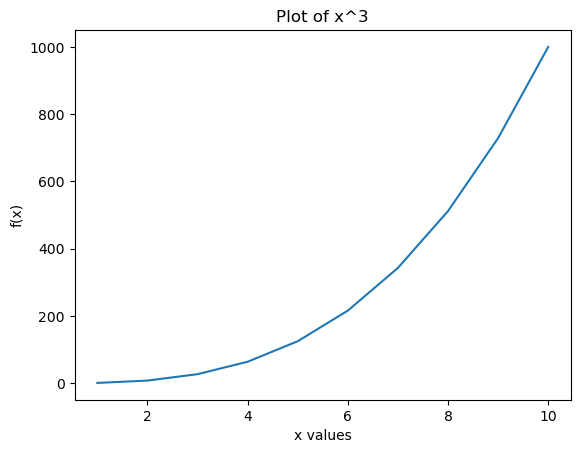

In [45]:
#f)
def PlotPower(x_range, power):
    y = Power3(x_range, power)
    plt.plot(x_range, y)
    plt.title('Plot of x^3')
    plt.xlabel('x values')
    plt.ylabel('f(x)')
    plt.show()
    
PlotPower(range(1, 11, 1), 3)

In [48]:
#3) a) chapter 5 ques 8
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n is the total number of observations and p is the number of predictors. In this case there are two predictors which are x and x-squared
n=100 and p=2.

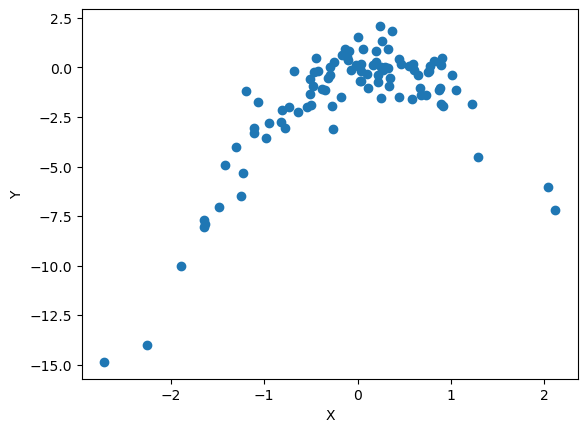

In [51]:
#b) 
plt.scatter(x,y);
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


this is a quadratic plot, decressing acceleartion , there are some outliers at the corner values

In [54]:
#c) LOOCV 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
np.random.seed(123) #setting random seed
cv_errors = np.zeros(4)
for degree in range(1, 5):
    X_poly = np.vander(x, degree + 1, increasing=True)  # Generate polynomial features
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=len(x), scoring='neg_mean_squared_error')
    cv_errors[degree - 1] = -np.mean(scores)

for i, error in enumerate(cv_errors, start=1):
    print(f'LOOCV for highest deg {i} model: {error:.3f}')

LOOCV for highest deg 1 model: 6.633
LOOCV for highest deg 2 model: 1.123
LOOCV for highest deg 3 model: 1.302
LOOCV for highest deg 4 model: 1.332


the lowest error is in model two which is expected since its closest to real form. 

In [57]:
#d) 
np.random.seed(42) #changing random seed
cv_errors2 = np.zeros(4)
for degree in range(1, 5):
    X_poly = np.vander(x, degree + 1, increasing=True)  # Generate polynomial features
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=len(x), scoring='neg_mean_squared_error')
    cv_errors2[degree - 1] = -np.mean(scores)

for i, error in enumerate(cv_errors2, start=1):
    print(f'LOOCV for highest deg {i} model: {error:.3f}')

LOOCV for highest deg 1 model: 6.633
LOOCV for highest deg 2 model: 1.123
LOOCV for highest deg 3 model: 1.302
LOOCV for highest deg 4 model: 1.332


the LOOCV remains the same despite changing the seed. there is no random effect resulting from the observations used for the test set

#e) The model 2 has least error because it is the one that closely assembles the true underlying form, other models are either picking up noise or underfitting


In [61]:
from ISLP.models import ModelSpec as MS, summarize, poly
df=pd.DataFrame({'x':x,'y':y})
X= MS([poly('x', degree=4)],intercept=False).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
summarize(result)

,coef,std err,t,P>|t|
"poly(x, degree=4)[0]",16.6000,1.911,8.685,0.000
"poly(x, degree=4)[1]",-22.2244,1.911,-11.627,0.000
"poly(x, degree=4)[2]",-1.0768,1.911,-0.563,0.575
"poly(x, degree=4)[3]",2.2726,1.911,1.189,0.237


p val is only significant for x and x -squared

### question 9

In [109]:
boston=load_data('Boston')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [69]:
#a) population mean 
mu_hat=boston['medv'].mean()
mu_hat

22.532806324110677

In [71]:
#b) 
SE_mu_hat=boston['medv'].std()/(len(boston))**0.5
SE_mu_hat

0.4088611474975351

In [97]:
#c) using bootstrapping - for 10000 samples with replacement  

sample_means=[]
for _ in range(10000):
    sample_means.append(boston['medv'].sample(n=len(boston),replace=True,random_state=None).mean())
boot_mean_std=np.std(sample_means)
boot_mean_std

0.4070615315661762

In [91]:
#the bootstrapping provides nearly similar std to that of the population, running with 10000 iterations gives consistent results

In [105]:
#d) conf int 
print('The 95% confidence interval for the mean is', mu_hat-2*boot_mean_std,mu_hat+2*boot_mean_std)
print('The 95% confidence interval for the mean is', mu_hat-2*SE_mu_hat,mu_hat+2*SE_mu_hat)


The 95% confidence interval for the mean is 21.718683260978324 23.34692938724303
The 95% confidence interval for the mean is 21.715084029115605 23.35052861910575


In [107]:
#e) for median population
mu_med=boston['medv'].median()
mu_med

21.2

In [111]:
#f) 
sample_medians=[]
for _ in range(10000):
    sample_medians.append(boston['medv'].sample(n=len(boston),replace=True).median())
boot_med_std=np.std(sample_medians)
boot_med_std

0.37789582158976004

In [113]:
#there is skewness in the distribution, median is more reliable measure

In [117]:
#g)
mu_hat_01=np.percentile(boston['medv'],10)
print(mu_hat_01)

12.75

In [121]:
#h) using bootstrap
sample_percentiles=[]
for _ in range(10000):
    sample=boston['medv'].sample(n=len(boston),replace=True)
    sample_percentiles.append(np.percentile(sample,10))
boot_mu01_std=np.std(sample_percentiles)
boot_mu01_std

0.5029341642799781

In [126]:
#The standard error is small relatively to the tenth percentile value. Quite close conf intervals